# Multiple Regression

Let's grab a small little data set of Blue Book car values:

In [13]:
import pandas as pd

#Create a data frame from data in excel file
df = pd.read_excel('cars.xls')

                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


/tmp/ipykernel_7570/2280230834.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df1.groupby(pd.cut(df1['Mileage'],bins)).mean()


<Axes: xlabel='Mileage'>

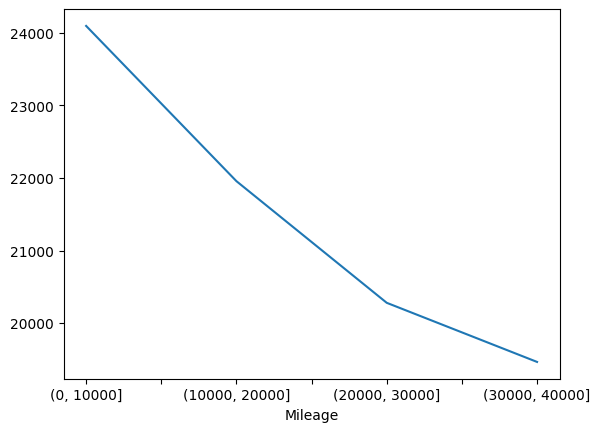

In [14]:

%matplotlib inline
import numpy as np

#On crée une nouvelle data frame qui ne contient que le kilométrage et le prix
df1=df[['Mileage','Price']]

#bins est un tableau d'entiers de 0->50000 avec un pas de 10000
bins =  np.arange(0,50000,10000)

#Cette ligne regroupe par intervalle [0,10.000],[10.000,20.000],[20.000,30.000],[30.000,40.000] en fonction du kilométrage
#Puis on calcule la moyenne des prix de chaque groupe
groups = df1.groupby(pd.cut(df1['Mileage'],bins)).mean()

#Cette ligne affiche les cinq premiers groupes et leurs moyennes de prix.
print(groups.head())

#Cette ligne trace un graphe en des "lignes" de la moyenne du prix par groupe en fonction du kilométrage.
groups['Price'].plot.line()

#Le graphe nous trace la relation entre le prix moyen d'une voiture et sa distance parcourue

In [15]:
#L'équation mathématique entre les variables Mileage, Cylinder, Doors et Price peut être représentée par un modèle de 
#régression linéaire multiple :

# Price = α + β*Mileage + γ*Cylinder + δ*Doors + ε

#α = intercept,
#β, γ et δ sont les coefficients de régression correspondant à chaque variable Mileage, Cylinder, Doors
#ε est l'erreur ou le résidu

#On exécute le code ci-dessous

We can use pandas to split up this matrix into the feature vectors we're interested in, and the value we're trying to predict.

Let's scale our feature data into the same range so we can easily compare the coefficients we end up with.

In [16]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
#Cette ligne crée une instance de la classe StandardScaler qui sera utilisée pour normaliser les données
scale = StandardScaler()

#Cette ligne crée une data frame X qui contient les variables ={kilométrage, nbre_cylindres, nbre_portes}
X = df[['Mileage', 'Cylinder', 'Doors']]
#Cette ligne crée une data frame y qui contient la variable  prix de chaque voiture
y = df['Price']

# standardisation
#Cette ligne normalise les variables en utilisant la méthode fit_transform
X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)

#On affiche par la suite la data frame normalisée 
print (X)

#Ordinary Least Squares to create the model
#Cette ligne crée un objet OLS qui utilise la méthode des moindres carrés ordinaires pour créer le modèle
est = sm.OLS(y, X).fit()

#Cette ligne affiche un résumé des résultats de l'estimation du modèle
est.summary()

      Mileage  Cylinder     Doors
0   -1.417485   0.52741  0.556279
1   -1.305902   0.52741  0.556279
2   -0.810128   0.52741  0.556279
3   -0.426058   0.52741  0.556279
4    0.000008   0.52741  0.556279
..        ...       ...       ...
799 -0.439853   0.52741  0.556279
800 -0.089966   0.52741  0.556279
801  0.079605   0.52741  0.556279
802  0.750446   0.52741  0.556279
803  1.932565   0.52741  0.556279

[804 rows x 3 columns]


/tmp/ipykernel_7570/3717846865.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.064
Model:                            OLS   Adj. R-squared (uncentered):              0.060
Method:                 Least Squares   F-statistic:                              18.11
Date:                Wed, 28 Feb 2024   Prob (F-statistic):                    2.23e-11
Time:                        20:21:58   Log-Likelihood:                         -9207.1
No. Observations:                 804   AIC:                                  1.842e+04
Df Residuals:                     801   BIC:                                  1.843e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage    -1272.3412    804.623     -1.581      0.114   -2851.759     307.077
Cylinder    5587.4472    804.509      6.945      0.000    4008.252    7166.642
Doors      -1404.5513    804.275     -1.746      0.081   -2983.288     174.185
==============================================================================
Omnibus:                      157.913   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.529
Skew:                           1.278   Prob(JB):                     1.20e-56
Kurtosis:                       4.074   Cond. No.                         1.03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Explain the code above and the obtained results (look for the significance of each measure)... ?
What can you deduce when comparing the obtained coefficients ?

Explication :
D'après les résultats on obtien les coefficients suivant :

β = -1272.3412	
γ = 5587.4472
δ = -1404.5513

Cela signifie que pour une unité de changement dans chacune de ces variables :
le prix change de la quantité correspondante en dollars. 
Par exemple, pour chaque unité de changement dans le nombre de cylindres, le prix augmentera de 5587.4472 dollars.

R_squared=0.064 => on remarque qu'elle est proche de 0
Il s'agit d'un mauvais modèle

Les p-values (P>|t|) associées aux variables Mileage(0.114) et Doors(0.081) sont supérieures à 0,05 ;
ce qui signifie qu'il n'y a pas suffisamment de preuves statistiques pour affirmer que ces variables ont un impact 
significatif sur le prix.

En revanche, la p-value associée à la variable Cylinder(0.000) est inférieure à 0,05, 
ce qui signifie qu'il y a suffisamment de preuves statistiques pour affirmer que cette variable a un impact 
significatif sur le prix. 
Conclusion la variable Cylinder a le plus d'impact sur le prix des voitures.


    
Now, lets find out if the number of doors is important in predicting car prices:

In [17]:
y.groupby(df.Doors).mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64


How would you use the learned model to make an actual prediction? Start by scaling your multiple feature variables into the same scale used to train the model, then just call est.predict() on the scaled features:

In [18]:
#Prediction for a car with 45000 Mileage, 8 cylinders and 4 doors
scaled = scale.transform([[45000, 8, 4]])
print(scaled)
predicted = est.predict(scaled[0])
print(predicted)
y= -1272.3412

[[3.07256589 1.96971667 0.55627894]]
[6315.01330583]


## Activity

- Create a copy of the input data on your disk, and see if you can create a measurable influence of number of doors on price. 
- Look if there are Outliers in the dataset, if yes, do some data cleaning.
- Try adding 8 door cars into the set and see how it affects the results.

Les voitures avec 4 portes sont plus chères.


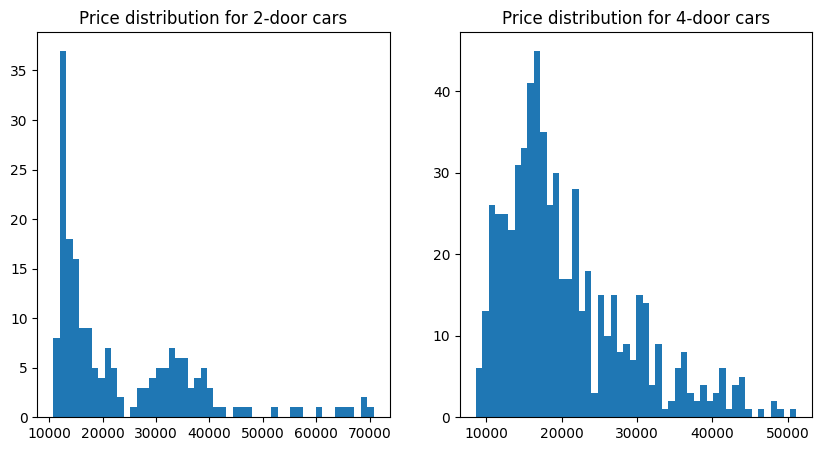

In [19]:
import matplotlib.pyplot as plt
import numpy as np

#On utilise la méthode to_csv de la bibliothèque pandas, on aura un fichier car_data.csv dans le répertoire courant
df.to_csv('car_data.csv')

#On sépare les prix des cars pour doors={2, 4}
price_2door = df[df['Doors'] == 2]['Price']
price_4door = df[df['Doors'] == 4]['Price']

#On calcule la médiane du prix pour chaque groupe
median_2door = price_2door.median()
median_4door = price_4door.median()

#Comparer les médiane du prix
if median_2door > median_4door:
    print("Les voitures avec 2 portes sont plus chères.")
elif median_2door < median_4door:
    print("Les voitures avec 4 portes sont plus chères.")
else:
    print("Les voitures avec 2 et 4 portes ont la même médiane du prix")
 
#Pour vérifier les outliers :
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(price_2door, 50)
axs[0].set_title('Price distribution for 2-door cars')
axs[1].hist(price_4door, 50)
axs[1].set_title('Price distribution for 4-door cars')

plt.show()

#On remarque qu'il y'a des outliers => on utilise la fonction reject_outliers qu'on a utilisé dans le lab6 du TP1

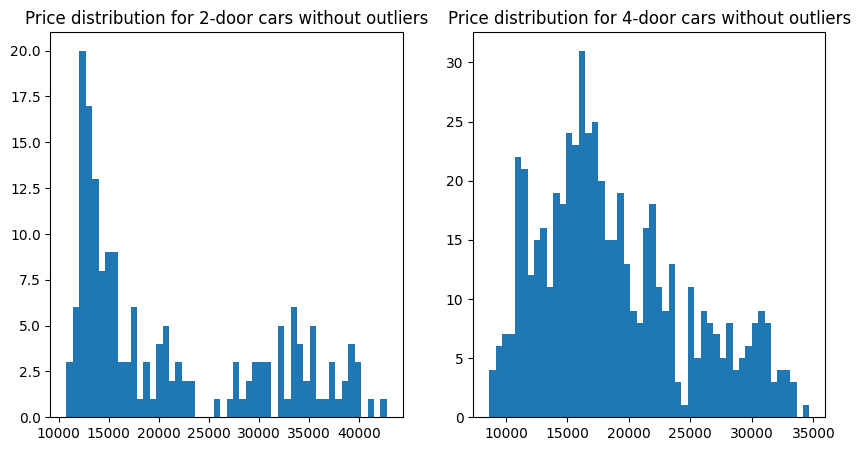

In [20]:
def reject_outliers(data):
    u = np.median(data)
    s = np.std(data)
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    return filtered

filtered_price_2door = reject_outliers(price_2door)
filtered_price_4door = reject_outliers(price_4door)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(filtered_price_2door, 50)
axs[0].set_title('Price distribution for 2-door cars without outliers')
axs[1].hist(filtered_price_4door, 50)
axs[1].set_title('Price distribution for 4-door cars without outliers')

plt.show()

In [21]:
#Créer une nouvelle data frame contenant 3 voitures avec 8 portes
new_cars = pd.DataFrame({
    'Mileage': [50000, 60000, 70000],
    'Cylinder': [6, 8, 10],
    'Doors': [8, 8, 8],
    'Price': [30000, 40000, 50000]
})

#Concaténer la nouvelle DF avec celle déja existante
df = pd.concat([df, new_cars])

In [22]:
#On sépare les prix des cars pour doors={2, 4, 8}
price_2door = df[df['Doors'] == 2]['Price']
price_4door = df[df['Doors'] == 4]['Price']
price_8door = df[df['Doors'] == 8]['Price']

#On calcule la médiane du prix pour chaque groupe
median_2door = price_2door.median()
median_4door = price_4door.median()
median_8door = price_8door.median()

# Comparer les médianes de prix
if median_2door > median_4door and median_2door > median_8door:
    print("Les voitures avec 2 portes sont plus chères.")
elif median_4door > median_2door and median_4door > median_8door:
    print("Les voitures avec 4 portes sont plus chères.")
elif median_8door > median_2door and median_8door > median_4door:
    print("Les voitures avec 8 portes sont plus chères.")
else:
    print("Les voitures ont la même médiane de prix.")

Les voitures avec 8 portes sont plus chères.


##### #Conclusion : Il y'a toujours différence significative entre le prix des voitures à 2 portes et celles à 4 portes même avec l'ajout des voitures à 8 portes